In [1]:
import matplotlib.pyplot as plt
import seaborn as sea
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import random
import math

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

import scipy.spatial.distance as dist
from scipy import stats
import statistics as stat
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

plt.rcParams['svg.fonttype'] = 'none'

## Import Cluster CCFs and leision locations

In [2]:
unique_locations = ['Liver','Lung','cfDNA','Chest', 'Lymph','Abdomen','Skin','Breast']

In [3]:

pat_1002_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1002_pre_post_updated/1002_with_pre_post.cluster_ccfs.txt", sep='\t',
                      low_memory=False)
pat_1598_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1598_new_pon_results/1598.cluster_ccfs.txt", sep='\t')
pat_1078_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1078_new_pon_results/1078.cluster_ccfs.txt", sep='\t')
pat_1326_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1326_firecloud_phylo/1326_cfDNA_high_purity.cluster_ccfs.txt", sep='\t')
pat_1644_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1644_passed_muts_results/1644.cluster_ccfs.txt", sep='\t')
pat_2819_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2819_passed_muts_results/2819.cluster_ccfs.txt", sep='\t',
                      low_memory=False)
pat_2389_cluster = pd.read_csv("/Users/lmartin/Documents/2023/2389_multiple_6_bl_tree_0515/2389_multiple_6_bl_tree_v1/2389_multiple_6.cluster_ccfs.txt", sep='\t')
pat_2974_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/2974_new_pon_results/2974.cluster_ccfs.txt", sep='\t')
pat_1035_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1035_with_indel/1035.cluster_ccfs.txt", sep='\t')

pat_1534_cluster = pd.read_csv('~/Documents/2024/RA_1534_vm_new_bams/RA_1534_bl_TBX/1534_bl_TBX/1534.cluster_ccfs.txt',sep='\t')

pat_1547_cluster = pd.read_csv('~/Documents/2020/new_pon_breast_phylo/1547_0915/1547_newer_bl_tree/1547.cluster_ccfs.txt',sep='\t',
                          low_memory=False)
pat_1558_cluster = pd.read_csv('~/Documents/2023/RA_1558_fix_pies/take_3/1558_fix_pies_v3/1558.cluster_ccfs.txt',sep='\t')
pat_2542_cluster = pd.read_csv('~/Documents/2023/RA_2542_PIK3CA/2542_high_purity_v6_morebl_moreiter_results/2542_high_purity_v6_morebl_moreiter.cluster_ccfs.txt',sep='\t')
pat_1045_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1045_vm_phylo_results/1045.cluster_ccfs.txt",sep='\t')
pat_1113_cluster = pd.read_csv("/Users/lmartin/Documents/2020/new_pon_breast_phylo/1113_vm_phylo_results/1113.cluster_ccfs.txt",sep='\t')


pats_cluster_ccfs_list = [pat_1002_cluster, pat_1598_cluster, pat_1078_cluster, pat_1045_cluster, pat_1113_cluster,
            pat_1326_cluster, pat_1644_cluster, pat_2819_cluster, pat_2389_cluster, pat_2974_cluster, pat_1035_cluster, pat_1534_cluster,
                         pat_1547_cluster,pat_1558_cluster, pat_2542_cluster]

cluster_ccfs_df=pd.concat(pats_cluster_ccfs_list)


In [4]:
new_sample_names_2389 = ['Chest_A',
 'Chest_B',
 'Chest_C',
 'Abdomen_D',
 'Lung_E',
 'Lung_F',
 'Lung_G',
 'Lung_H',
 'Lung_I',
 'Lung_J',
 'Lung_K',
 'Lymph_node_L',
 'Chest_M',
 'Lung_N',
 'Lung_O',
 'Lung_P',
 'Chest_Q',
 'Breast_R',
 'Breast_S',
 'Breast_T']

new_sample_names_1002 = ['Skin_B1',
 'Skin_B2',
 'cfDNA_A1',
 'cfDNA_A2',
 'cfDNA_A3',
 'Chest_I',
 'Skin_B3',
 'Chest_R',
 'Lung_D',
 'Lung_L',
 'Lung_M',
 'Lung_G',
 'Lung_H',
 'Abdomen_O',
 'Lymph_node_F',
 'Abdomen_N',
 'Lung_J',
 'Skin_K',
 'Skin_Q',
 'Lymph_node_E',
 'Skin_C',
 'Abdomen_P']


new_sample_names_1598 = ['cfDNA_3775',
 'cfDNA_3803',
 'cfDNA_3830',
 'cfDNA_3858',
 'cfDNA_3886',
 'cfDNA_3913',
 'cfDNA_3942',
 'cfDNA_3970',
 'cfDNA_3998',
 'cfDNA_4026',
 'cfDNA_4054',
 'Lung_A',
 'Lymph_node_B',
 'Lymph_node_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J',
 'Liver_K',
 'Lymph_node_L',
 'Liver_M']

new_sample_names_1078 = ['cfDNA_0077',
 'cfDNA_0131',
 'cfDNA_0238',
 'cfDNA_0312',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Lymph_node_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J']

new_sample_names_1045 = ['cfDNA_2694',
 'cfDNA_2750',
 'cfDNA_2806',
 'cfDNA_2918',
 'cfDNA_2971',
 'cfDNA_2999',
 'cfDNA_3017',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I',
 'Liver_J',
 'Liver_K',
 'Liver_L',
 'Liver_M',
 'Lymph_node_N',
 'Lymph_node_O']

new_sample_names_1113 = ['Liver_A', 'Lung_B', 'Liver_C', 'Liver_D', 'Liver_E']

new_sample_names_1326 = ['cfDNA_BWES00001',
 'cfDNA_BWES00167',
 'Breast_3',
 'Chest_4',
 'Liver_5',
 'Liver_6',
 'Liver_7',
 'Liver_8',
 'Liver_9',
 'Liver_10']

new_sample_names_1644 = ['Lung_A', 'Lung_B', 'Lung_C', 'Lung_D', 'Lung_E']

new_sample_names_2819 = ['cfDNA_7916',
 'cfDNA_7937',
 'cfDNA_8239',
 'Lymph_node_A',
 'Lymph_node_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Abdomen_F',
 'Lymph_node_H',
 'Liver_I',
 'Liver_J',
 'Lymph_node_K',
 'Liver_L']

new_sample_names_2974 = ['cfDNA_1976',
 'Liver_A',
 'Abdomen_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Abdomen_G',
 'Abdomen_H',
 'Abdomen_I',
 'Abdomen_J',
 'Abdomen_K']

new_sample_names_1035 = ['Lung_A',
 'Liver_B',
 'Liver_C',
 'Liver_G',
 'Lung_D',
 'Chest_E',
 'Throat_I',
 'Abdomen_F',
 'Abdomen_H']

new_sample_names_1534 = ['Abdomen_A',
 'Abdomen_B',
 'Abdomen_C',
 'Abdomen_D',
 'Chest_E',
 'Liver_F']

new_sample_names_1547 = ['cfDNA_1995',
 'cfDNA_2044',
 'cfDNA_2070',
 'cfDNA_2114',
 'cfDNA_2177',
 'Liver_A',
 'Liver_B',
 'Liver_C',
 'Liver_D',
 'Liver_E',
 'Liver_F',
 'Liver_G',
 'Liver_H',
 'Liver_I']

new_sample_names_1558 = ['cfDNA_RA_1558_cfDNA_3',
 'cfDNA_RA_1558_cfDNA_4',
 'cfDNA_RA_1558_cfDNA_5',
 'cfDNA_RA_1558_cfDNA_6',
 'cfDNA_RA_1558_cfDNA_7',
 'Lung_1558_2',
 'Lung_1558_3',
 'Lymph_node_1558_5',
 'Liver_1558_6',
 'Liver_1558_7',
 'Liver_1558_8',
 'Liver_1558_9',
 'Liver_1558_10',
 'Liver_1558_11',
 'Liver_1558_12',
 'Abdomen_1558_16',
 'Lymph_node_1558_17',
 'Lymph_node_1558_18',
 'Chest_1558_20']

new_sample_names_2542 = ['Chest_2542_1',
 'Chest_2542_2',
 'Chest_2542_3',
 'Abdomen_2542_12',
 'Abdomen_2542_13']


new_sample_names_in_order = [new_sample_names_1002,
 new_sample_names_1598,
 new_sample_names_1078,
 new_sample_names_1045,
 new_sample_names_1113,
 new_sample_names_1326,
 new_sample_names_1644,
 new_sample_names_2819,
 new_sample_names_2389,
 new_sample_names_2974,
 new_sample_names_1035,
 new_sample_names_1534,
 new_sample_names_1547,
 new_sample_names_1558,
 new_sample_names_2542]

In [7]:
pat_num_samples_on_tree = []
for cluster_ccfs in pats_cluster_ccfs_list:
    pat_num_samples_on_tree.append(list(cluster_ccfs['Sample_ID'].unique()))

pat_1002_num_clusters_on_tree = [5,6,8,18,15,17,14,20,16,19,10,12,13,11,19,21]
pat_1598_num_clusters_on_tree =[6,2,5,3,4,7,8,9]
pat_1078_num_clusters_on_tree =[2, 3, 4, 5, 6]
pat_1045_num_clusters_on_tree =[3,10,9,14,4,13,15,11]
pat_1113_num_clusters_on_tree =[10,2,8,3,5,12]
pat_1326_num_clusters_on_tree =[2,9,12,13,6,10]
pat_1644_num_clusters_on_tree = [3,6,7,8]

pat_2819_num_clusters_on_tree =[5,6,7,10,11,8,9]
pat_2389_num_clusters_on_tree=[3,5,16,10,14,12,4,9,15,7,17,6,11,13,18]
pat_2974_num_clusters_on_tree=[4,6,3,2,5]
pat_1035_num_clusters_on_tree=[7,4,10,6,5,9,8]
pat_1534_num_clusters_on_tree=[2, 3, 4]
pat_1547_num_clusters_on_tree=[8,15,2,12,6,9,13]
pat_1558_num_clusters_on_tree=[4,8,3,7,2,5,6,10,11,9]
pat_2542_num_clusters_on_tree=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

clusters_on_tree_list = [pat_1002_num_clusters_on_tree, pat_1598_num_clusters_on_tree, 
                         pat_1078_num_clusters_on_tree, pat_1045_num_clusters_on_tree, 
                          pat_1113_num_clusters_on_tree,
                pat_1326_num_clusters_on_tree, pat_1644_num_clusters_on_tree, 
                         pat_2819_num_clusters_on_tree, 
                          pat_2389_num_clusters_on_tree, pat_2974_num_clusters_on_tree, 
                         pat_1035_num_clusters_on_tree, pat_1534_num_clusters_on_tree,
                         pat_1547_num_clusters_on_tree,pat_1558_num_clusters_on_tree, 
                         pat_2542_num_clusters_on_tree]

## Calculate Earth Mover's Distances between samples in patients

In [11]:
def earth_movers_by_ccf_sum(ccfs_df, samples, clones_on_tree,patient_id, new_sample_names):

    # store distance dictionaries per clone
    clones_df_list = []
    
    # Compute pairwise Wasserstein distances for each clone
    for clone in clones_on_tree:

        all_samples_per_clone = ccfs_df[ccfs_df['Cluster_ID'] == clone]
        # initiate distance df per given clone
        clone_ccf_dist = pd.DataFrame(0.0, index=samples, columns=samples)
        
        # get sample pairs
        for i in range(len(samples)):
            for j in range(i + 1, len(samples)):
                # clone CCF dist for sample1
                sample1 = all_samples_per_clone[all_samples_per_clone['Sample_ID'] == samples[i]].iloc[:, 7:].values.flatten()
                # clone CCF dist for sample 2
                sample2 = all_samples_per_clone[all_samples_per_clone['Sample_ID'] == samples[j]].iloc[:, 7:].values.flatten()
                # Compute Wasserstein distance if both clones are present in both samples
                if sample1.size > 0 and sample2.size > 0:  # Ensure both samples have data
                    distance = wasserstein_distance(sample1, sample2)
                else:
                    distance = np.nan  # Handle cases where one or both samples have no data

                # Update the distance matrix
                # at square sample1,sample2 = distance
                clone_ccf_dist.iat[i, j] = distance
                clone_ccf_dist.iat[j, i] = distance  # Symmetric matrix
                
        # I am calculating the distance between 2 samples per every clone
        clones_df_list.append(clone_ccf_dist)

    # then the ccf distance for each pair of samples is the SUM of the distance between all of the clones in both samples
    # try sum instead of mean because the # of clones potentially brings in a confounder that biases towards the total number of clones present
    
    sum_ccf_dist = sum(clones_df_list)
    sum_ccf_dist.rename(index=dict(zip(sum_ccf_dist.index, new_sample_names)), columns=dict(zip(sum_ccf_dist.columns, new_sample_names)), inplace=True)

    ## plotting code 
    return sum_ccf_dist

In [12]:
ccf_dist_df_2389= earth_movers_by_ccf_sum(pats_cluster_ccfs_list[8], 
                                              pat_num_samples_on_tree[8], 
                        clusters_on_tree_list[8], '2389',new_sample_names_2389)

In [13]:
## compute for all patients
all_ccf_dist_dfs = []
patients_in_ccf_order = []
for i in range(len(pats_cluster_ccfs_list)):
    patient=list(pats_cluster_ccfs_list[i]['Patient_ID'].unique())[0]
    patients_in_ccf_order.append(patient)
    ccf_dist_df = earth_movers_by_ccf_sum(pats_cluster_ccfs_list[i], pat_num_samples_on_tree[i], 
                        clusters_on_tree_list[i], patient,new_sample_names_in_order[i])
    all_ccf_dist_dfs.append(ccf_dist_df)

In [93]:
## plot clustermap
def plot_EMD_matrix(EMD_matrix, patient_id):
    clustermap=sns.clustermap(EMD_matrix,cmap='Reds',row_cluster=True, col_cluster=True,
                             vmin=0, vmax=0.1, )
    #clustermap.ax_row_dendrogram.set_visible(False)
    #clustermap.ax_col_dendrogram.set_visible(False)
    clustermap.fig.suptitle('RA '+str(patient_id))
    clustermap.savefig('Patient_' + str(patient_id)+'_'+'_Earth_Movers_CCF_Clustermap_Sum.svg',
            dpi=300,bbox_inches='tight')
    return clustermap


/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


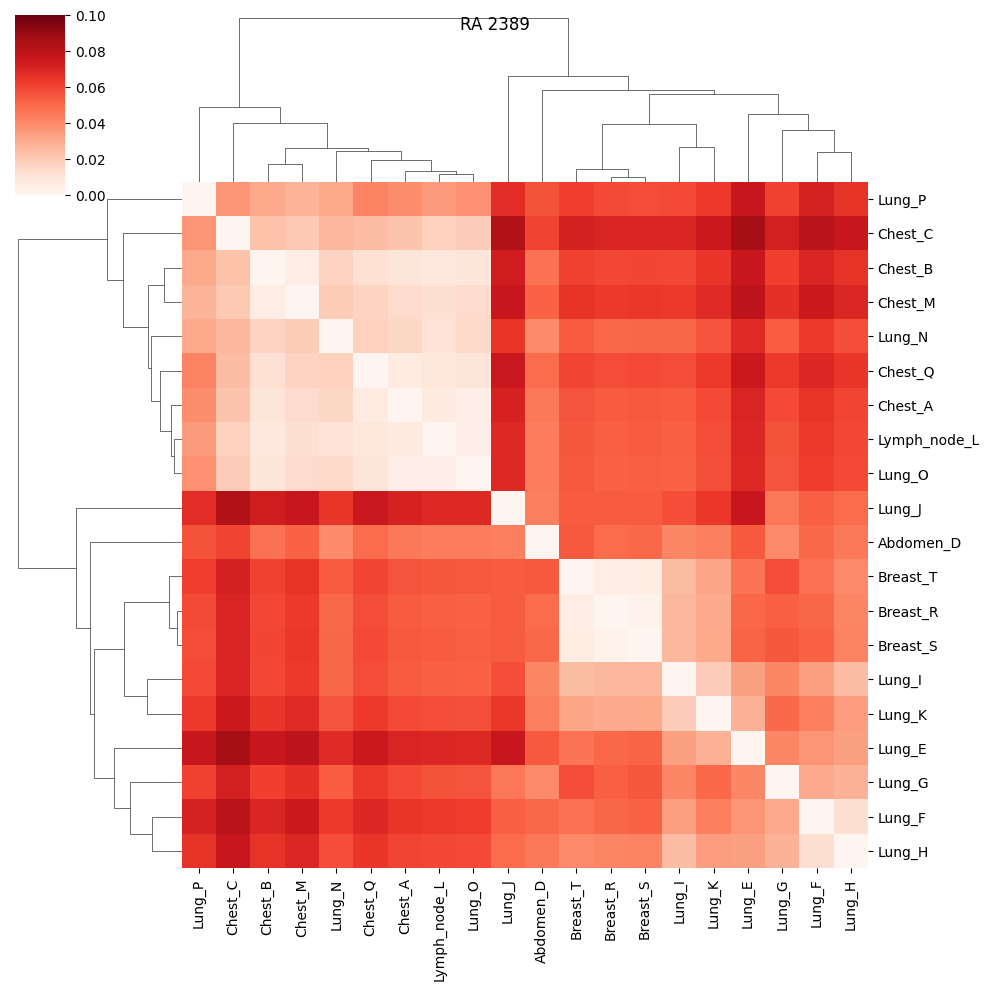

In [94]:
plot_EMD_matrix(ccf_dist_df_2389, '2389')

## Compare lesions within a patient

In [17]:
def compare_lesion_locations(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
    
    
    same_no_nan = [val for val in loc_to_same_loc_df.median(axis=1) if not math.isnan(val)]
    diff_no_nan = [val for val in loc_to_not_loc_df.median(axis=1) if not math.isnan(val)]
    
    all_vals = same_no_nan + diff_no_nan

    input_bins=np.histogram_bin_edges(all_vals, 
            bins=(len(all_vals))+1, range=(min(all_vals),max(all_vals)), weights=None)
    
    fig,(ax1)=plt.subplots(nrows=1,ncols=1,figsize=(7,5))

    sns.histplot(loc_to_same_loc_df.median(axis=1),bins=input_bins,alpha=0.8,label=str(location) + " to "+str(location),ax=ax1,color='dodgerblue')
    sns.histplot(loc_to_not_loc_df.median(axis=1),bins=input_bins,alpha=0.8,label=str(location) + " to Other",ax=ax1,color='orange')
    ax1.legend(loc='upper right')
    x_coord = 0.05 * (ax1.get_xlim()[1] - ax1.get_xlim()[0]) + ax1.get_xlim()[0]
    y_coord = 0.95 * (ax1.get_ylim()[1] - ax1.get_ylim()[0]) + ax1.get_ylim()[0]

    ax1.text(x=x_coord, y=y_coord, s="p_value = " + str(round(p_val,5)), ha='left', va='top', fontsize=12)
    #ax1.set(ylim=(0, 5))
    #ax1.set(xlim=(0,0.005))
    
    fig.tight_layout()
    #fig.savefig(str(patient_id)+"_"+str(location)+"_distances_better_bins.svg")
    return p_val


np.float64(0.031209012771740218)

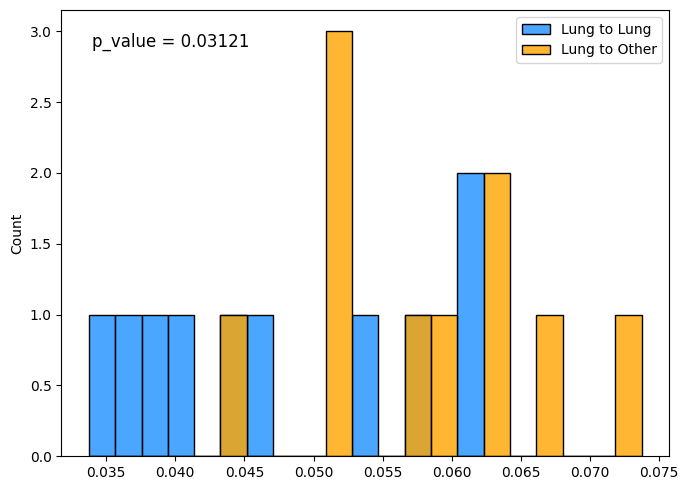

In [18]:
compare_lesion_locations(8,'Lung')

np.float64(0.02318819125884748)

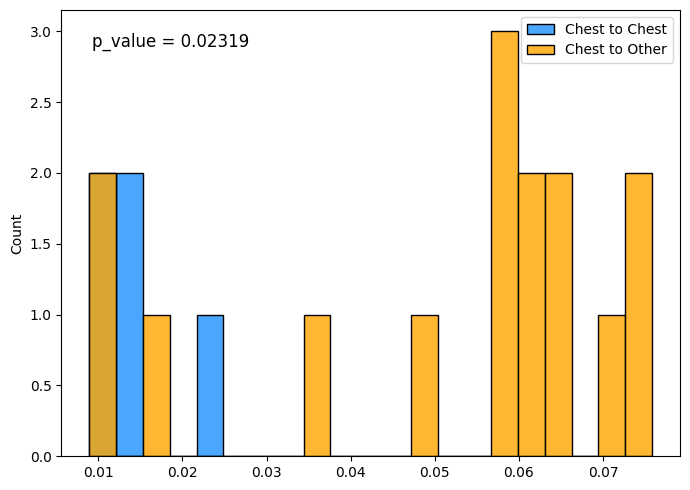

In [19]:
compare_lesion_locations(8,'Chest')

np.float64(0.00811430913711653)

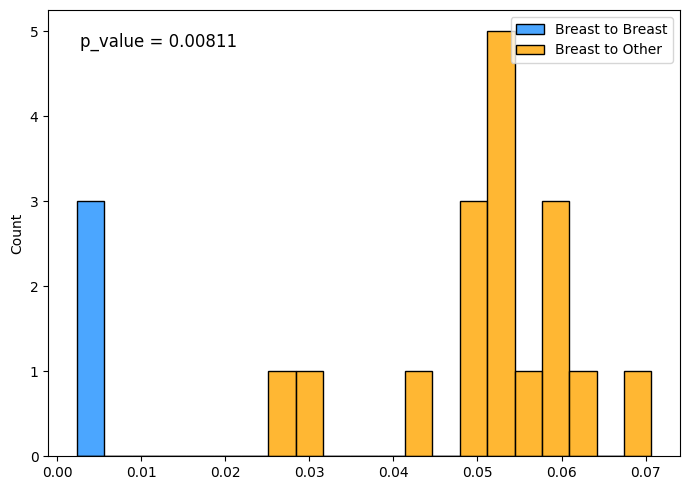

In [20]:
compare_lesion_locations(8,'Breast')

## Compare distances between organs across patients

In [21]:
def compare_all_sample_lesion_locations_same_location(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    
    #stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
 
    return list(loc_to_same_loc_df.median(axis=1).values)

def compare_all_sample_lesion_locations_diff_location(pat_index, location):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    patient_id = patients_in_ccf_order[pat_index]
    loc = []
    for i,row in ccf_dist_pat.iterrows():
        if row.name.split('_')[0] == location:
            loc.append(row.name)
        
    loc_df = ccf_dist_pat[ccf_dist_pat.index.isin(loc)]
    loc_to_same_loc_df = loc_df[loc]
    not_loc_df = ccf_dist_pat[~ccf_dist_pat.index.isin(loc)]
    loc_to_not_loc_df = not_loc_df[loc]
    
    #stat, p_val = stats.mannwhitneyu(loc_to_same_loc_df.median(axis=1), loc_to_not_loc_df.median(axis=1))
 
    return list(loc_to_not_loc_df.median(axis=1).values)


same_to_same_dict = {}
diff_dict = {}

for location in unique_locations:
    list_of_same_to_same_medians = []
    list_of_diff_locs_medians = []
    
    for i in range(len(all_ccf_dist_dfs)):
        same_to_same = compare_all_sample_lesion_locations_same_location(i,location)
        different_locs  = compare_all_sample_lesion_locations_diff_location(i,location)

        if len(same_to_same) > 2:
            for val in same_to_same:
                list_of_same_to_same_medians.append(val)
            
        if len(different_locs)>2:
            for val in different_locs:
                if not math.isnan(val):
                    list_of_diff_locs_medians.append(val)
                
    same_to_same_dict[location]=np.median(list_of_same_to_same_medians)
    diff_dict[location]=np.median(list_of_diff_locs_medians)

In [152]:

def compare_two_lesion_locations(pat_index, location1, location2):
    ccf_dist_pat = all_ccf_dist_dfs[pat_index]
    
    # Get lists of samples for each location
    loc1 = [idx for idx in ccf_dist_pat.index if idx.split('_')[0] == location1]
    loc2 = [idx for idx in ccf_dist_pat.index if idx.split('_')[0] == location2]
    
    if not loc1 or not loc2:  # Skip if either location is missing
        return [], 0
    
    if location1 == location2:
        # For same-location comparisons, only use upper triangle to avoid duplicates
        distances = []
        for i, sample1 in enumerate(loc1):
            for sample2 in loc1[i+1:]:  # Start from i+1 to get upper triangle
                dist = ccf_dist_pat.loc[sample1, sample2]
                if not np.isnan(dist):
                    distances.append(dist)
        return distances, len(loc1)
    else:
        # For different locations, use all pairs but only in one direction
        distances = []
        for sample1 in loc1:
            for sample2 in loc2:
                dist = ccf_dist_pat.loc[sample1, sample2]
                if not np.isnan(dist):
                    distances.append(dist)
        return distances, len(loc1) * len(loc2)

def all_location_comparison(location):
    loc_dict = {}
    num_comparisons = {loc: 0 for loc in unique_locations}
    
    # Initialize dictionaries
    for location2 in unique_locations:
        loc_dict[location2] = []
    
    # Gather distances across all patients
    for i in range(len(all_ccf_dist_dfs)):
        for location2 in unique_locations:
            distances, num_pairs = compare_two_lesion_locations(i, location, location2)
            loc_dict[location2].extend(distances)
            num_comparisons[location2] += num_pairs
    
    # Remove locations with no data points
    loc_dict = {k: v for k, v in loc_dict.items() if len(v) > 10}

    # Create and sort dataframe
    location_comparison_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in loc_dict.items()]))
    medians = location_comparison_df.median()
    sorted_columns = medians.sort_values().index
    sorted_location_comparison_df = location_comparison_df[sorted_columns]
    
    # Plotting
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8,7))
    
    sns.boxplot(data=sorted_location_comparison_df, orient='v',
                ax=ax1, color='grey', fill=False, showfliers=None)
    sns.swarmplot(data=sorted_location_comparison_df, orient='v',
                 ax=ax1, color='grey', alpha=0.5, zorder=0.5, size=4)
    
    ax1.set_title(f"Clonal Composition Differences Between {location} and Other Organs")
    ax1.set_xlabel('Lesion Location')
    ax1.set_ylabel('Earth Mover\'s Distance')


    # Add number of comparisons to x-labels
    ax1.set_xticks(range(len(sorted_columns)))
    ax1.set_xticklabels([f'{loc}\n(n={len(loc_dict[loc])})' for loc in sorted_columns], 
                        rotation=45, ha='right')
    
        # Compute pairwise statistical tests and add significance bars
    p_val_dict = {}
    bar_height = ax1.get_ylim()[1]  # Get the current y-axis maximum
    bar_increment = (ax1.get_ylim()[1] - ax1.get_ylim()[0]) * 0.000000000001  # Space between bars
    
    # Track number of bars to stack
    significant_pairs = []
    for i, loc1 in enumerate(sorted_columns):
        for j, loc2 in enumerate(sorted_columns[i+1:], i+1):
            if len(loc_dict[loc1]) > 1 and len(loc_dict[loc2]) > 1:
                stat, p_val = stats.mannwhitneyu(loc_dict[loc1], loc_dict[loc2])
                comparison = f"{location} to {loc1} vs {location} to {loc2}"
                p_val_dict[comparison] = p_val
                
                # If significant, store the pair and p-value
                if p_val < 0.05:
                    significant_pairs.append((i, j, p_val))
    
    # Sort by distance between pairs to optimize bar placement
    significant_pairs.sort(key=lambda x: x[1] - x[0])
    
    # Add significance bars
    for level, (i, j, p_val) in enumerate(significant_pairs):
        bar_height = ax1.get_ylim()[1] + (level) * bar_increment
        
        # Draw the bar
        x1, x2 = i, j
        ax1.plot([x1, x1, x2, x2], [bar_height-bar_increment, bar_height, bar_height, bar_height-bar_increment], 
                 color='black', linewidth=1)
        
        # Add significance asterisks
        if p_val < 0.001:
            sig_symbol = '***'
        elif p_val < 0.01:
            sig_symbol = '**'
        else:
            sig_symbol = '*'
            
        ax1.text((x1 + x2) * 0.5, bar_height, sig_symbol, 
                 ha='center', va='bottom')
    
    # Adjust the plot limits to show all bars
    if significant_pairs:
        ax1.set_ylim(ax1.get_ylim()[0], bar_height+0.009 + bar_increment)
    
    fig.tight_layout()
    fig.savefig(str(location)+"_to_other_locations_distances_boxplot.svg")
    return p_val_dict, sorted_location_comparison_df


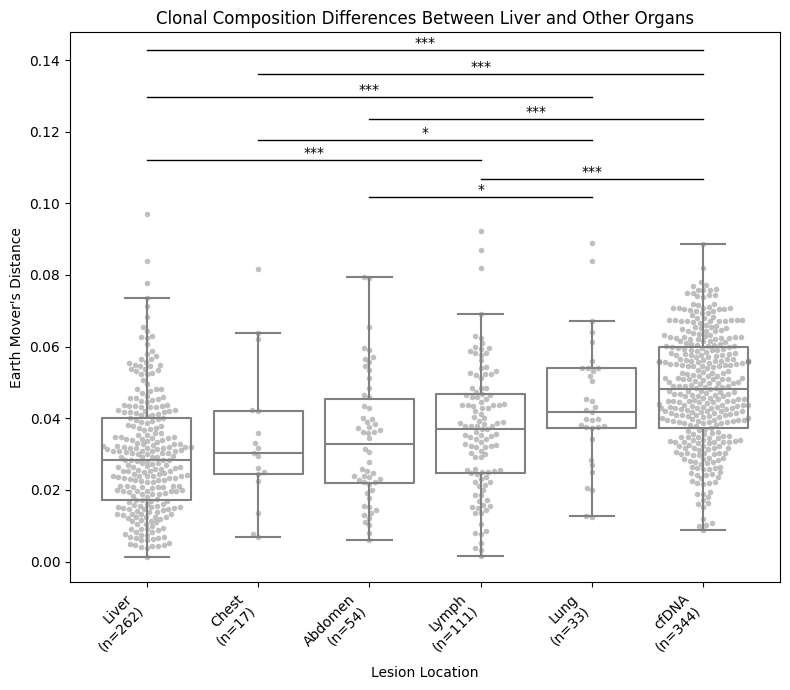

In [151]:
liver_comparison_dict, sorted_liver_locs = all_location_comparison('Liver')

In [154]:
liver_dist_df = pd.DataFrame.from_dict(liver_comparison_dict,orient='index',columns=['pvals'])
liver_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
liver_dist_df.to_csv('liver_comparison_pvals.tsv',sep='\t')

In [29]:
liver_comparison_dict

{'Liver to Liver vs Liver to Chest': np.float64(0.12078351906364794),
 'Liver to Liver vs Liver to Abdomen': np.float64(0.004077288801917169),
 'Liver to Liver vs Liver to Lymph': np.float64(6.1900241543055005e-09),
 'Liver to Liver vs Liver to Lung': np.float64(3.9024686704993085e-07),
 'Liver to Liver vs Liver to Breast': np.float64(0.005313461586553697),
 'Liver to Liver vs Liver to cfDNA': np.float64(9.339074259683715e-61),
 'Liver to Chest vs Liver to Abdomen': np.float64(0.9838748119668126),
 'Liver to Chest vs Liver to Lymph': np.float64(0.32218109856569166),
 'Liver to Chest vs Liver to Lung': np.float64(0.04056270159826883),
 'Liver to Chest vs Liver to Breast': np.float64(0.05238392423747115),
 'Liver to Chest vs Liver to cfDNA': np.float64(0.0009470060677970977),
 'Liver to Abdomen vs Liver to Lymph': np.float64(0.22885217633707766),
 'Liver to Abdomen vs Liver to Lung': np.float64(0.011904157983004855),
 'Liver to Abdomen vs Liver to Breast': np.float64(0.08705884843877403)

/opt/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 20.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


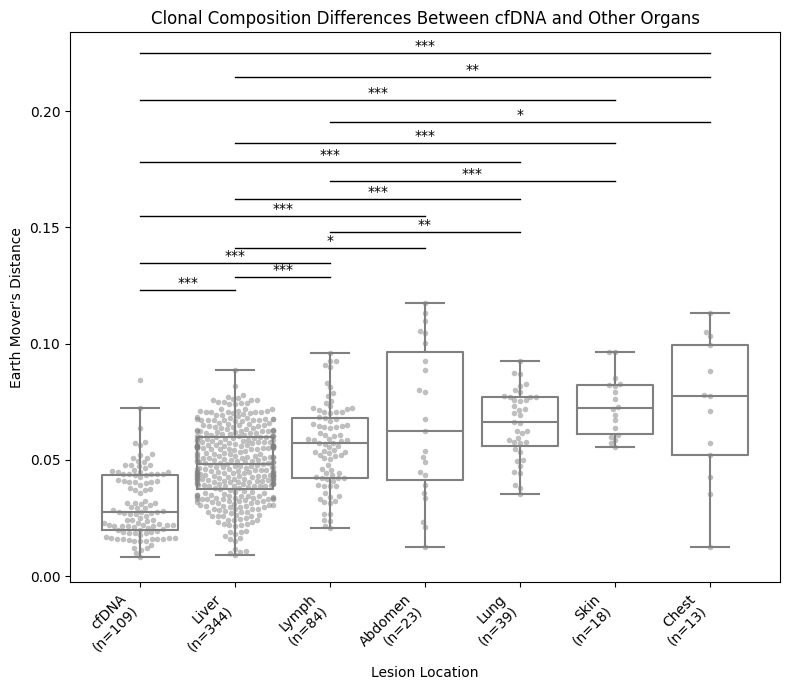

In [153]:
cfDNA_comparison_dict, sorted_cfDNA_locs = all_location_comparison('cfDNA')

In [155]:
cfDNA_dist_df = pd.DataFrame.from_dict(cfDNA_comparison_dict,orient='index',columns=['pvals'])
cfDNA_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
cfDNA_dist_df.to_csv('cfDNA_comparison_pvals.tsv',sep='\t')

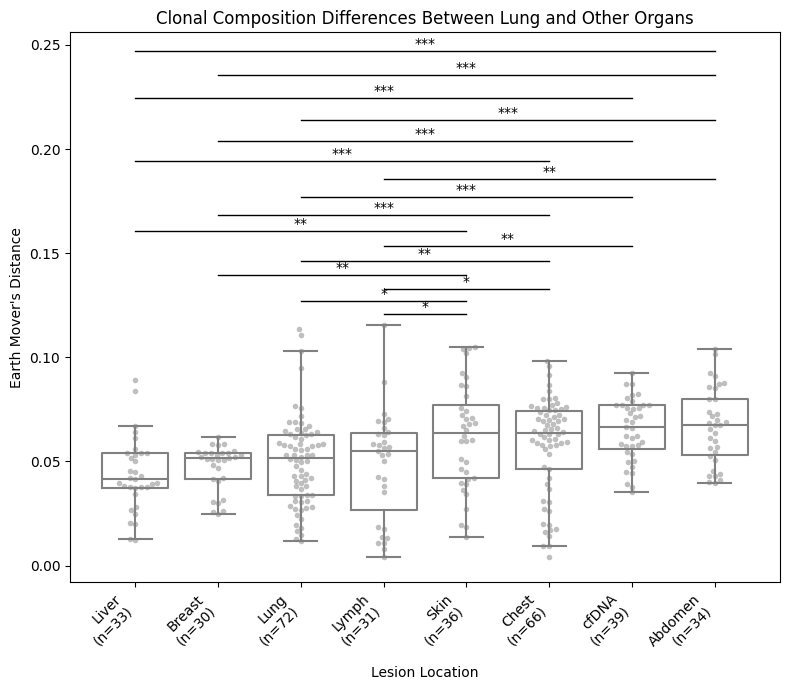

In [156]:
lung_comparison_dict, sorted_lung_locs = all_location_comparison('Lung')
lung_dist_df = pd.DataFrame.from_dict(lung_comparison_dict,orient='index',columns=['pvals'])
lung_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
lung_dist_df.to_csv('lung_comparison_pvals.tsv',sep='\t')

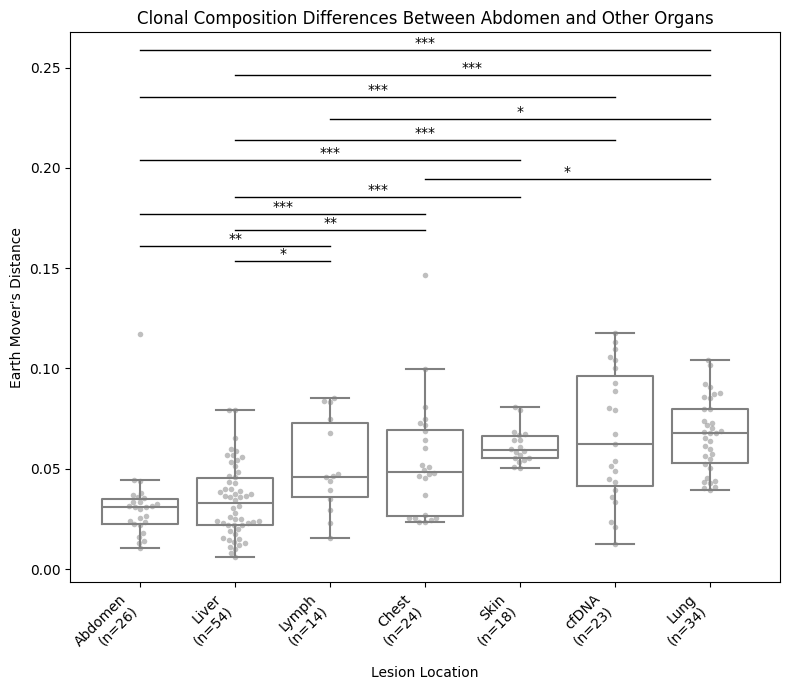

In [157]:
abdomen_comparison_dict, sorted_abdomen_locs = all_location_comparison('Abdomen')
abdomen_dist_df = pd.DataFrame.from_dict(abdomen_comparison_dict,orient='index',columns=['pvals'])
abdomen_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
abdomen_dist_df.to_csv('abdomen_comparison_pvals.tsv',sep='\t')

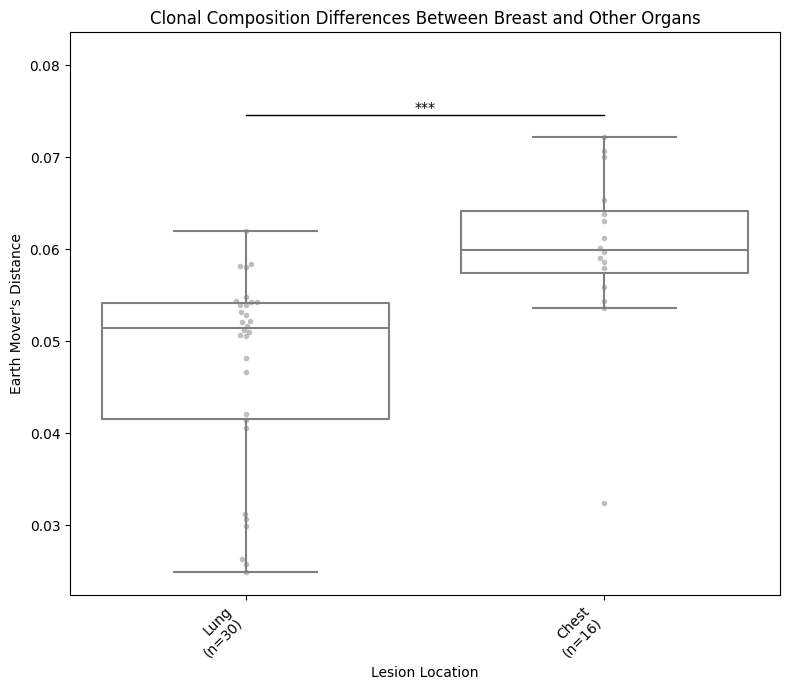

In [158]:
breast_comparison_dict, sorted_breast_locs = all_location_comparison('Breast')
breast_dist_df = pd.DataFrame.from_dict(breast_comparison_dict,orient='index',columns=['pvals'])
breast_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
breast_dist_df.to_csv('breast_comparison_pvals.tsv',sep='\t')

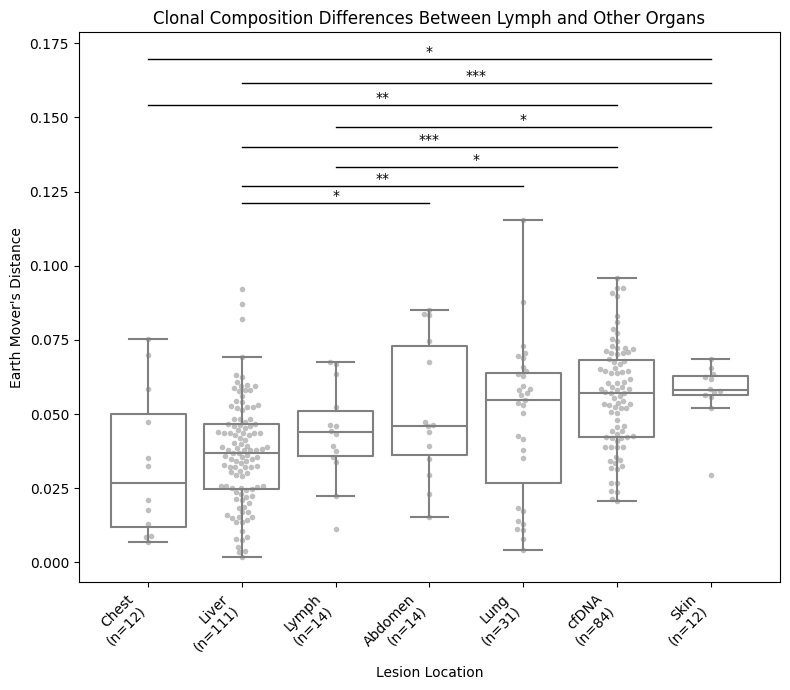

In [160]:
lymph_comparison_dict, sorted_lymph_locs = all_location_comparison('Lymph')
lymph_dist_df = pd.DataFrame.from_dict(lymph_comparison_dict,orient='index',columns=['pvals'])
lymph_dist_df.sort_values(by='pvals',ascending=True,inplace=True)
lymph_dist_df.to_csv('lymph_comparison_pvals.tsv',sep='\t')

In [161]:
abdomen_p_vals = pd.read_csv('abdomen_comparison_pvals.tsv',sep='\t')
liver_p_vals = pd.read_csv('liver_comparison_pvals.tsv',sep='\t')
lung_p_vals = pd.read_csv('lung_comparison_pvals.tsv',sep='\t')
cfDNA_p_vals = pd.read_csv('cfDNA_comparison_pvals.tsv',sep='\t')
breast_p_vals = pd.read_csv('breast_comparison_pvals.tsv',sep='\t')
lymph_p_vals = pd.read_csv('lymph_comparison_pvals.tsv',sep='\t')


all_p_vals = [liver_p_vals,lung_p_vals,cfDNA_p_vals,abdomen_p_vals,breast_p_vals, lymph_p_vals]

In [163]:
lesion_comparison_pvals = pd.concat(all_p_vals)
lesion_comparison_pvals.to_csv('lesion_location_pvals.tsv',sep='\t')

In [39]:
def count_unique_location_pairs(location1, location2):
    total_pairs = 0
    for pat_df in all_ccf_dist_dfs:
        loc1_samples = [idx for idx in pat_df.index if idx.split('_')[0] == location1]
        loc2_samples = [idx for idx in pat_df.index if idx.split('_')[0] == location2]
        # Only count pairs in one direction
        total_pairs += len(loc1_samples) * len(loc2_samples)
    return total_pairs

liver_cfdna_pairs = count_unique_location_pairs('Liver', 'cfDNA')
print(f"Number of unique Liver-cfDNA sample pairs: {liver_cfdna_pairs}")

Number of unique Liver-cfDNA sample pairs: 344


In [52]:
def count_samples_per_patient(location1, location2):
    details = []
    total_pairs = 0
    
    for i, pat_df in enumerate(all_ccf_dist_dfs):
        # Get patient ID
        patient_id = patients_in_ccf_order[i]
        
        # Count samples of each type
        loc1_samples = [idx for idx in pat_df.index if idx.split('_')[0] == location1]
        loc2_samples = [idx for idx in pat_df.index if idx.split('_')[0] == location2]
        
        # Calculate number of pairs
        num_pairs = len(loc1_samples) * len(loc2_samples)
        total_pairs += num_pairs
        
        if num_pairs > 0:
            details.append({
                'patient': patient_id,
                f'{location1}_samples': len(loc1_samples),
                f'{location2}_samples': len(loc2_samples),
                'pairs': num_pairs
            })
    
    # Print detailed breakdown
    print(f"\nDetailed breakdown of {location1}-{location2} pairs:")
    for d in details:
        print(f"Patient {d['patient']}: {d[f'{location1}_samples']} {location1} × {d[f'{location2}_samples']} {location2} = {d['pairs']} pairs")
    
    print(f"\nTotal unique {location1}-{location2} pairs: {total_pairs}")
    return total_pairs

liver_cfdna_pairs = count_samples_per_patient('cfDNA', 'cfDNA')


Detailed breakdown of cfDNA-cfDNA pairs:
Patient 1002_with_pre_post: 3 cfDNA × 3 cfDNA = 9 pairs
Patient 1598: 11 cfDNA × 11 cfDNA = 121 pairs
Patient 1078: 4 cfDNA × 4 cfDNA = 16 pairs
Patient 1045: 7 cfDNA × 7 cfDNA = 49 pairs
Patient 1326_cfDNA_high_purity: 2 cfDNA × 2 cfDNA = 4 pairs
Patient 2819: 3 cfDNA × 3 cfDNA = 9 pairs
Patient 2974: 1 cfDNA × 1 cfDNA = 1 pairs
Patient 1547: 5 cfDNA × 5 cfDNA = 25 pairs
Patient 1558: 5 cfDNA × 5 cfDNA = 25 pairs

Total unique cfDNA-cfDNA pairs: 259


In [51]:
unique_locations = ['Liver','Lung', 'Chest', 'Lymph','Skin', 'Breast', 'Abdomen','Throat','cfDNA']
def count_cfdna_pairs():
    details = {}
    total_pairs = 0
    
    # Initialize counters for each organ type
    for location in unique_locations:
        if location != 'cfDNA':
            details[location] = 0
    
    for i, pat_df in enumerate(all_ccf_dist_dfs):
        patient_id = patients_in_ccf_order[i]
        cfdna_samples = [idx for idx in pat_df.index if idx.split('_')[0] == 'cfDNA']
        
        if cfdna_samples:  # Only process if patient has cfDNA samples
            print(f"\nPatient {patient_id}: {len(cfdna_samples)} cfDNA samples")
            
            # Count pairs with each other organ type
            for organ in unique_locations:
                if organ != 'cfDNA':
                    organ_samples = [idx for idx in pat_df.index if idx.split('_')[0] == organ]
                    if organ_samples:
                        num_pairs = len(cfdna_samples) * len(organ_samples)
                        details[organ] += num_pairs
                        print(f"  - {organ}: {len(organ_samples)} samples = {num_pairs} pairs")
    
    print("\nTotal pairs by organ type:")
    for organ, count in details.items():
        print(f"{organ}: {count} pairs")
        total_pairs += count
    
    print(f"\nTotal cfDNA-to-organ pairs: {total_pairs}")
    return details

cfdna_pair_counts = count_cfdna_pairs()


Patient 1002_with_pre_post: 3 cfDNA samples
  - Lung: 6 samples = 18 pairs
  - Chest: 2 samples = 6 pairs
  - Lymph: 2 samples = 6 pairs
  - Skin: 6 samples = 18 pairs
  - Abdomen: 3 samples = 9 pairs

Patient 1598: 11 cfDNA samples
  - Liver: 9 samples = 99 pairs
  - Lung: 1 samples = 11 pairs
  - Lymph: 3 samples = 33 pairs

Patient 1078: 4 cfDNA samples
  - Liver: 9 samples = 36 pairs
  - Lymph: 1 samples = 4 pairs

Patient 1045: 7 cfDNA samples
  - Liver: 13 samples = 91 pairs
  - Lymph: 2 samples = 14 pairs

Patient 1326_cfDNA_high_purity: 2 cfDNA samples
  - Liver: 6 samples = 12 pairs
  - Chest: 1 samples = 2 pairs
  - Breast: 1 samples = 2 pairs

Patient 2819: 3 cfDNA samples
  - Liver: 7 samples = 21 pairs
  - Lymph: 4 samples = 12 pairs
  - Abdomen: 1 samples = 3 pairs

Patient 2974: 1 cfDNA samples
  - Liver: 5 samples = 5 pairs
  - Abdomen: 6 samples = 6 pairs

Patient 1547: 5 cfDNA samples
  - Liver: 9 samples = 45 pairs

Patient 1558: 5 cfDNA samples
  - Liver: 7 samples

In [48]:
unique_locations_only_tissue = ['Liver','Lung', 'Chest', 'Lymph','Skin', 'Breast', 'Abdomen','Throat']

In [49]:
def count_anatomical_site_pairs():
    details = {(loc1, loc2): 0 for loc1 in unique_locations_only_tissue for loc2 in unique_locations_only_tissue if loc1 < loc2}
    total_pairs = 0
    
    for i, pat_df in enumerate(all_ccf_dist_dfs):
        patient_id = patients_in_ccf_order[i]
        print(f"\nPatient {patient_id}:")
        
        # Count pairs between each location type
        for loc1 in unique_locations_only_tissue:
            for loc2 in unique_locations_only_tissue:
                if loc1 < loc2:  # Only count each pair once
                    loc1_samples = [idx for idx in pat_df.index if idx.split('_')[0] == loc1]
                    loc2_samples = [idx for idx in pat_df.index if idx.split('_')[0] == loc2]
                    
                    if loc1_samples and loc2_samples:
                        num_pairs = len(loc1_samples) * len(loc2_samples)
                        details[(loc1, loc2)] += num_pairs
                        print(f"  - {loc1}-{loc2}: {len(loc1_samples)} × {len(loc2_samples)} = {num_pairs} pairs")
    
    print("\nTotal pairs by location combination:")
    for (loc1, loc2), count in sorted(details.items()):
        if count > 0:
            print(f"{loc1}-{loc2}: {count} pairs")
            total_pairs += count
    
    print(f"\nTotal distinct anatomical site pairs: {total_pairs}")
    return details

anatomical_pair_counts = count_anatomical_site_pairs()


Patient 1002_with_pre_post:
  - Lung-Lymph: 6 × 2 = 12 pairs
  - Lung-Skin: 6 × 6 = 36 pairs
  - Chest-Lung: 2 × 6 = 12 pairs
  - Chest-Lymph: 2 × 2 = 4 pairs
  - Chest-Skin: 2 × 6 = 12 pairs
  - Lymph-Skin: 2 × 6 = 12 pairs
  - Abdomen-Lung: 3 × 6 = 18 pairs
  - Abdomen-Chest: 3 × 2 = 6 pairs
  - Abdomen-Lymph: 3 × 2 = 6 pairs
  - Abdomen-Skin: 3 × 6 = 18 pairs

Patient 1598:
  - Liver-Lung: 9 × 1 = 9 pairs
  - Liver-Lymph: 9 × 3 = 27 pairs
  - Lung-Lymph: 1 × 3 = 3 pairs

Patient 1078:
  - Liver-Lymph: 9 × 1 = 9 pairs

Patient 1045:
  - Liver-Lymph: 13 × 2 = 26 pairs

Patient 1113:
  - Liver-Lung: 4 × 1 = 4 pairs

Patient 1326_cfDNA_high_purity:
  - Chest-Liver: 1 × 6 = 6 pairs
  - Breast-Liver: 1 × 6 = 6 pairs
  - Breast-Chest: 1 × 1 = 1 pairs

Patient 1644:

Patient 2819:
  - Liver-Lymph: 7 × 4 = 28 pairs
  - Abdomen-Liver: 1 × 7 = 7 pairs
  - Abdomen-Lymph: 1 × 4 = 4 pairs

Patient 2389_multiple_6:
  - Lung-Lymph: 10 × 1 = 10 pairs
  - Chest-Lung: 5 × 10 = 50 pairs
  - Chest-Lymp

In [50]:
def count_same_site_pairs():
    details = {loc: 0 for loc in unique_locations_only_tissue}
    total_pairs = 0
    
    for i, pat_df in enumerate(all_ccf_dist_dfs):
        patient_id = patients_in_ccf_order[i]
        print(f"\nPatient {patient_id}:")
        
        # Count pairs within each location type
        for location in unique_locations_only_tissue:
            loc_samples = [idx for idx in pat_df.index if idx.split('_')[0] == location]
            if len(loc_samples) > 1:  # Need at least 2 samples to make pairs
                # Number of unique pairs is n*(n-1)/2 where n is number of samples
                num_pairs = (len(loc_samples) * (len(loc_samples) - 1)) // 2
                details[location] += num_pairs
                print(f"  - {location}: {len(loc_samples)} samples = {num_pairs} pairs")
    
    print("\nTotal pairs by location:")
    for location, count in sorted(details.items()):
        if count > 0:
            print(f"{location}: {count} pairs")
            total_pairs += count
    
    print(f"\nTotal same-site pairs: {total_pairs}")
    return details

same_site_pair_counts = count_same_site_pairs()


Patient 1002_with_pre_post:
  - Lung: 6 samples = 15 pairs
  - Chest: 2 samples = 1 pairs
  - Lymph: 2 samples = 1 pairs
  - Skin: 6 samples = 15 pairs
  - Abdomen: 3 samples = 3 pairs

Patient 1598:
  - Liver: 9 samples = 36 pairs
  - Lymph: 3 samples = 3 pairs

Patient 1078:
  - Liver: 9 samples = 36 pairs

Patient 1045:
  - Liver: 13 samples = 78 pairs
  - Lymph: 2 samples = 1 pairs

Patient 1113:
  - Liver: 4 samples = 6 pairs

Patient 1326_cfDNA_high_purity:
  - Liver: 6 samples = 15 pairs

Patient 1644:
  - Lung: 5 samples = 10 pairs

Patient 2819:
  - Liver: 7 samples = 21 pairs
  - Lymph: 4 samples = 6 pairs

Patient 2389_multiple_6:
  - Lung: 10 samples = 45 pairs
  - Chest: 5 samples = 10 pairs
  - Breast: 3 samples = 3 pairs

Patient 2974:
  - Liver: 5 samples = 10 pairs
  - Abdomen: 6 samples = 15 pairs

Patient 1035:
  - Liver: 3 samples = 3 pairs
  - Lung: 2 samples = 1 pairs
  - Abdomen: 2 samples = 1 pairs

Patient 1534:
  - Abdomen: 4 samples = 6 pairs

Patient 1547:
